In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv('kddcup99_csv.csv')

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [4]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
duration                       494020 non-null int64
protocol_type                  494020 non-null object
service                        494020 non-null object
flag                           494020 non-null object
src_bytes                      494020 non-null int64
dst_bytes                      494020 non-null int64
land                           494020 non-null int64
wrong_fragment                 494020 non-null int64
urgent                         494020 non-null int64
hot                            494020 non-null int64
num_failed_logins              494020 non-null int64
logged_in                      494020 non-null int64
lnum_compromised               494020 non-null int64
lroot_shell                    494020 non-null int64
lsu_attempted                  494020 non-null int64
lnum_root                      494020 non-null int64
lnum_file_creations            494020 

In [6]:
df.shape

(494020, 42)

In [7]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
print('Data set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Data set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 66 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
Name: service, dtype: int64


In [9]:
from sklearn import preprocessing

In [10]:
lab=preprocessing.LabelEncoder()

In [11]:
df['protocol_type']=lab.fit_transform(df['protocol_type'])
df['service']=lab.fit_transform(df['service'])
df['flag']=lab.fit_transform(df['flag'])

In [12]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
duration                       494020 non-null int64
protocol_type                  494020 non-null int32
service                        494020 non-null int32
flag                           494020 non-null int32
src_bytes                      494020 non-null int64
dst_bytes                      494020 non-null int64
land                           494020 non-null int64
wrong_fragment                 494020 non-null int64
urgent                         494020 non-null int64
hot                            494020 non-null int64
num_failed_logins              494020 non-null int64
logged_in                      494020 non-null int64
lnum_compromised               494020 non-null int64
lroot_shell                    494020 non-null int64
lsu_attempted                  494020 non-null int64
lnum_root                      494020 non-null int64
lnum_file_creations            494020 non

### Rename all label: 0=normal, 1=DoS, 2=Probe, R2L and U2R.

DOS: denial-of-service, e.g. syn flood;
R2L: unauthorized access from a remote machine, e.g. guessing password;
U2R: unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow’’ attacks;
probing: surveillance and other probing, e.g., port scanning.

In [14]:
df1=df['label']

In [15]:
print('Label distribution Training set:')
print(df['label'].value_counts())

Label distribution Training set:
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64


In [16]:
newdf=df1.replace({'normal':0,'smurf':1,'neptune':1,'back':1,'satan':2,'ipsweep':2,'portsweep':2,'warezclient': 2,'teardrop': 1,
                  'pod': 1,'nmap' : 2,'guess_passwd': 2,'buffer_overflow': 2,'land': 1,'warezmaster': 2,'imap': 2,'rootkit': 2,
                  'loadmodule': 2,'ftp_write': 2,'multihop': 2,'phf': 2,'perl': 2,'spy': 2})

In [17]:
print(newdf.head())
#newdf.to_csv('label.csv')

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64


In [18]:
df['label'] = newdf
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
duration                       494020 non-null int64
protocol_type                  494020 non-null int32
service                        494020 non-null int32
flag                           494020 non-null int32
src_bytes                      494020 non-null int64
dst_bytes                      494020 non-null int64
land                           494020 non-null int64
wrong_fragment                 494020 non-null int64
urgent                         494020 non-null int64
hot                            494020 non-null int64
num_failed_logins              494020 non-null int64
logged_in                      494020 non-null int64
lnum_compromised               494020 non-null int64
lroot_shell                    494020 non-null int64
lsu_attempted                  494020 non-null int64
lnum_root                      494020 non-null int64
lnum_file_creations            494020 non

In [20]:
df.to_csv('New_Data.csv')

In [21]:
data = pd.read_csv("New_Data.csv")

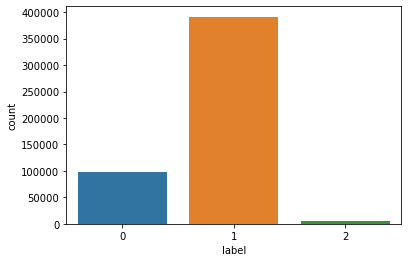

In [22]:
sns.countplot(x='label',data=data)

# Feature Selection

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [24]:
X = data.iloc[:,data.columns!='label'] 
y = data.iloc[:,data.columns=='label']   

In [25]:
model.fit(X,y)
print(model.feature_importances_)

[3.43674781e-02 4.32947438e-04 5.44898186e-02 5.18564549e-02
 1.69599450e-02 7.44430488e-03 8.86027110e-04 1.21813542e-05
 7.91117753e-03 7.99526086e-06 1.42462048e-02 1.56755122e-04
 1.43219385e-01 5.15995758e-03 1.00631562e-04 4.30024085e-06
 4.68743979e-05 3.32523248e-05 2.15716923e-05 2.49340264e-05
 0.00000000e+00 0.00000000e+00 1.32987354e-03 1.63155439e-01
 5.82656370e-02 1.82859981e-02 8.39172753e-03 4.54772360e-03
 3.62181462e-03 1.93853359e-02 2.28496803e-03 2.16608500e-02
 8.95235741e-02 9.96136132e-02 5.05246954e-02 9.73546567e-03
 4.12065425e-02 7.03054332e-03 1.04598109e-03 4.16429931e-02
 1.33599505e-02 8.00507674e-03]


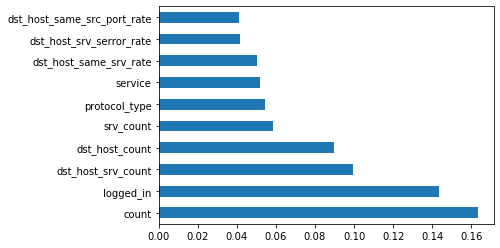

In [26]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.33)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf=RandomForestClassifier()

In [31]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
predic=rf.predict(xtest)

In [33]:
acc1=accuracy_score(predic,ytest)
acc1

0.9997607758224097